# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/veryv/OneDrive/桌面/MLcontest/ML100/data/Part01'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH_year'] = app_train['DAYS_BIRTH'] / 365

In [7]:
app_train['DAYS_BIRTH_year'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH_year, dtype: float64

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

### DAYS_BIRTH_year

In [21]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

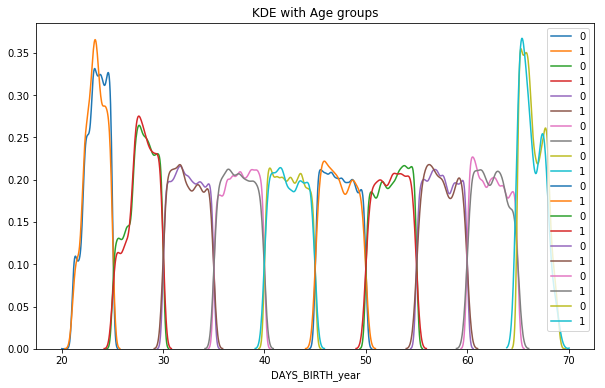

In [11]:
bin_cut =  np.linspace(20, 70, num = 11, endpoint = True)
app_train['YEARS_BINNED'] = pd.cut(app_train['DAYS_BIRTH_year'], bins = bin_cut)
year_group_sorted = app_train['YEARS_BINNED'].sort_values(ascending = True).unique().astype('object')

plt.figure(figsize=(10,6))
for i in range(len(year_group_sorted)):
    sns.distplot(app_train.loc[(app_train['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (app_train['TARGET'] == 0),'DAYS_BIRTH_year'], label = str(0),hist=False)
    
    sns.distplot(app_train.loc[(app_train['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (app_train['TARGET'] == 1),'DAYS_BIRTH_year'], label = str(1),hist=False)
plt.title('KDE with Age groups')
plt.show()

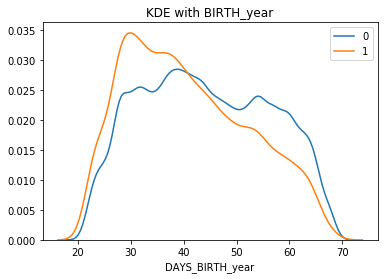

In [32]:
for i in range(1):
    sns.distplot(app_train.loc[(app_train['TARGET'] == 0), 'DAYS_BIRTH_year'], label = str(0),hist=False)
    sns.distplot(app_train.loc[(app_train['TARGET'] == 1), 'DAYS_BIRTH_year'], label = str(1),hist=False)
plt.title('KDE with BIRTH_year')
plt.show()

### DAYS_EMPLOYED_year

In [14]:
app_train['DAYS_EMPLOYED_year'] = abs(app_train['DAYS_EMPLOYED']) / 365
app_train['DAYS_EMPLOYED_year'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED_year, dtype: float64

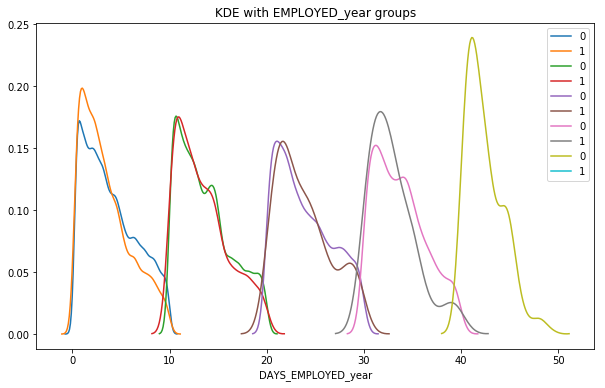

In [22]:
bin_cut =  np.linspace(0, 50, num = 6, endpoint = True)
app_train['YEARS_BINNED_EMPLOYED'] = pd.cut(app_train['DAYS_EMPLOYED_year'], bins = bin_cut)
year_group_sorted = app_train['YEARS_BINNED_EMPLOYED'].sort_values(ascending = True).unique().astype('object')

plt.figure(figsize = (10, 6))
for i in range(len(year_group_sorted)):
    sns.distplot(app_train.loc[(app_train['YEARS_BINNED_EMPLOYED'] == year_group_sorted[i]) & \
                               (app_train['TARGET'] == 0), 'DAYS_EMPLOYED_year'], label = str(0),hist=False)
    sns.distplot(app_train.loc[(app_train['YEARS_BINNED_EMPLOYED'] == year_group_sorted[i]) & \
                               (app_train['TARGET'] == 1), 'DAYS_EMPLOYED_year'], label = str(1),hist=False)
plt.title('KDE with EMPLOYED_year groups')
plt.show()

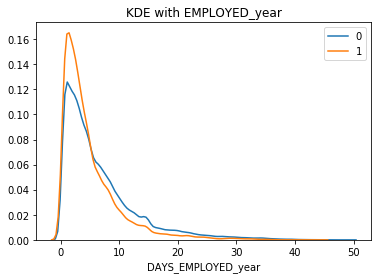

In [31]:
for i in range(1):
    sns.distplot(app_train.loc[(app_train['TARGET'] == 0), 'DAYS_EMPLOYED_year'], label = str(0),hist=False)
    sns.distplot(app_train.loc[(app_train['TARGET'] == 1), 'DAYS_EMPLOYED_year'], label = str(1),hist=False)
plt.title('KDE with EMPLOYED_year')
plt.show()

### DAYS_REGISTRATION

In [24]:
app_train['DAYS_REGISTRATION_year'] = abs(app_train['DAYS_REGISTRATION']) / 365
app_train['DAYS_REGISTRATION_year'].describe()

count    307511.000000
mean         13.660604
std           9.651743
min           0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION_year, dtype: float64

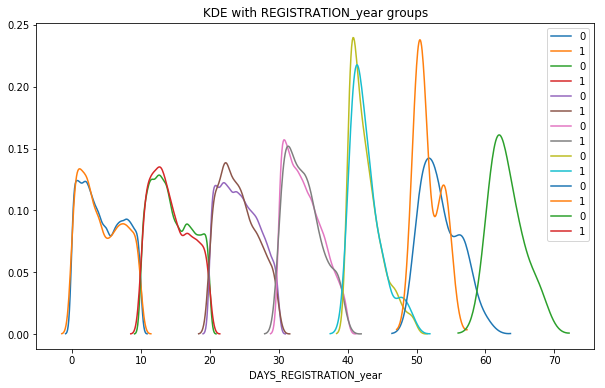

In [25]:
bin_cut =  np.linspace(0, 70, num = 8, endpoint = True)
app_train['YEARS_BINNED_REGISTRATION'] = pd.cut(app_train['DAYS_REGISTRATION_year'], bins = bin_cut)
year_group_sorted = app_train['YEARS_BINNED_REGISTRATION'].sort_values(ascending = True).unique().astype('object')

plt.figure(figsize = (10, 6))
for i in range(len(year_group_sorted)):
    sns.distplot(app_train.loc[(app_train['YEARS_BINNED_REGISTRATION'] == year_group_sorted[i]) & \
                               (app_train['TARGET'] == 0), 'DAYS_REGISTRATION_year'], label = str(0),hist=False)
    sns.distplot(app_train.loc[(app_train['YEARS_BINNED_REGISTRATION'] == year_group_sorted[i]) & \
                               (app_train['TARGET'] == 1), 'DAYS_REGISTRATION_year'], label = str(1),hist=False)
plt.title('KDE with REGISTRATION_year groups')
plt.show()

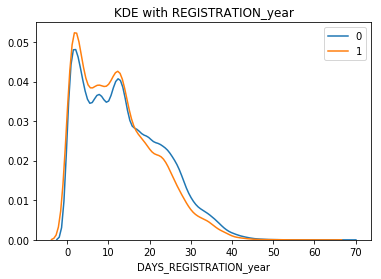

In [30]:
for i in range(1):
    sns.distplot(app_train.loc[(app_train['TARGET'] == 0), 'DAYS_REGISTRATION_year'], label = str(0),hist=False)
    sns.distplot(app_train.loc[(app_train['TARGET'] == 1), 'DAYS_REGISTRATION_year'], label = str(1),hist=False)
plt.title('KDE with REGISTRATION_year')
plt.show()

### DAYS_ID_PUBLISH

In [33]:
app_train['DAYS_ID_PUBLISH_year'] = abs(app_train['DAYS_ID_PUBLISH']) / 365
app_train['DAYS_ID_PUBLISH_year'].describe()

count    307511.000000
mean          8.203294
std           4.135481
min           0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH_year, dtype: float64

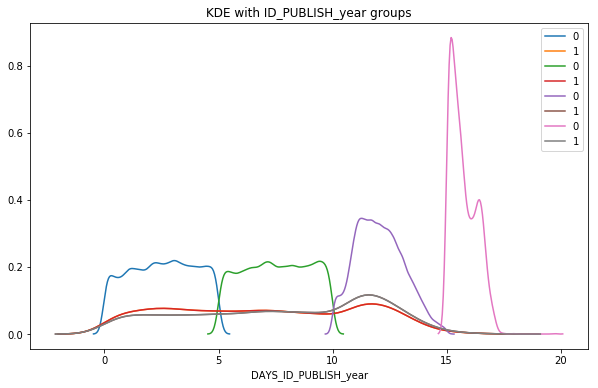

In [37]:
bin_cut =  np.linspace(0, 20, num = 5, endpoint = True)
app_train['YEARS_BINNED_ID_PUBLISH'] = pd.cut(app_train['DAYS_ID_PUBLISH_year'], bins = bin_cut)
year_group_sorted = app_train['YEARS_BINNED_ID_PUBLISH'].sort_values(ascending = True).unique().astype('object')

plt.figure(figsize = (10, 6))
for i in range(len(year_group_sorted)):
    sns.distplot(app_train.loc[(app_train['YEARS_BINNED_ID_PUBLISH'] == year_group_sorted[i]) & \
                               (app_train['TARGET'] == 0), 'DAYS_ID_PUBLISH_year'], label = str(0),hist=False)
    sns.distplot(app_train.loc[(app_train['YEARS_BINNED_REGISTRATION'] == year_group_sorted[i]) & \
                               (app_train['TARGET'] == 1), 'DAYS_ID_PUBLISH_year'], label = str(1),hist=False)
plt.title('KDE with ID_PUBLISH_year groups')
plt.show()

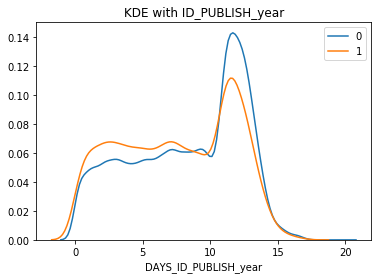

In [40]:
for i in range(1):
    sns.distplot(app_train.loc[(app_train['TARGET'] == 0), 'DAYS_ID_PUBLISH_year'], label = str(0),hist=False)
    sns.distplot(app_train.loc[(app_train['TARGET'] == 1), 'DAYS_ID_PUBLISH_year'], label = str(1),hist=False)
plt.title('KDE with ID_PUBLISH_year')
plt.show()